In [1]:
import pandas as pd
import matplotlib 
import numpy as np
from matplotlib import pyplot
import statistics
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_selection import SelectFromModel
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

sample_data=pd.read_csv('train.csv')
sample_data = sample_data.sample(frac=0.35, replace=False).sort_index()

'''Remove NaN values'''
sample_data = sample_data.dropna()

'''Normalization'''
columns = sample_data.columns[1:-3]
sample_data[columns] = sample_data[columns].apply(lambda x: (x-x.min())/(x.max()-x.min())) 
sample_data

'''Encoding'''
columns=sample_data.columns[8:12]
LE = LabelEncoder()
sample_data[columns] = sample_data[columns].apply(lambda columns: LE.fit_transform(columns))
sample_data

'''Remove Outliers'''
data_copy = sample_data.copy()
remove=data_copy[data_copy.columns[1:-3]]
remove = remove[(np.abs(stats.zscore(remove)) < 3).all(axis=1) == 1]
idx = list(remove.index)
data_copy =data_copy.loc[idx]
data_copy[data_copy.columns[1:-3]] = remove

'''Split Dataset'''
Y = data_copy['customer_category']
X = data_copy[data_copy.columns[1:-1]]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)


In [2]:
KNeighbor=KNeighborsClassifier(n_neighbors=6)
KNeighbor.fit(X_train, Y_train)
NaiveBayes=GaussianNB()
NaiveBayes.fit(X_train, Y_train)
RandomForest = RandomForestClassifier()
RandomForest.fit(X_train, Y_train)
SVM=SVC(kernel="linear", probability=True)
SVM.fit(X_train, Y_train)
Regression=LogisticRegression()
Regression.fit(X_train, Y_train)

c:\users\teet\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

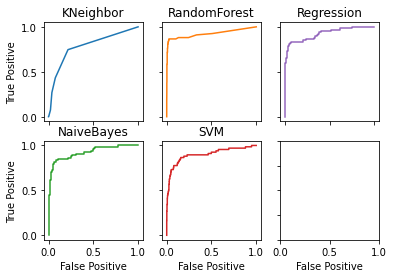

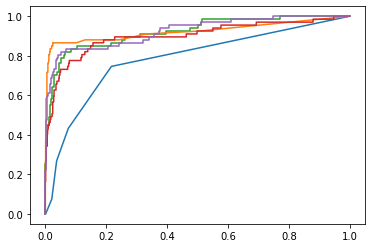

In [3]:
fig, axs = matplotlib.pyplot.subplots(2, 3)

Y1_pr = KNeighbor.predict_proba(X_test)[::,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(Y_test, Y1_pr)
auc1 = metrics.roc_auc_score(Y_test, Y1_pr)
axs[0,0].plot(fpr1,tpr1)
axs[0, 0].set_title('KNeighbor')


Y2_pr = NaiveBayes.predict_proba(X_test)[::,1]
fpr2, tpr2, thresholds2 = metrics.roc_curve(Y_test, Y2_pr)
auc2 = metrics.roc_auc_score(Y_test, Y2_pr)
axs[1, 0].plot(fpr2,tpr2, 'tab:green')
axs[1, 0].set_title('NaiveBayes')   


Y3_pr = RandomForest.predict_proba(X_test)[::,1]
fpr3, tpr3, thresholds3 = metrics.roc_curve(Y_test, Y3_pr)
auc3 = metrics.roc_auc_score(Y_test, Y3_pr)
axs[0, 1].plot(fpr3,tpr3, 'tab:orange')
axs[0, 1].set_title('RandomForest')   


Y4_pr = SVM.predict_proba(X_test)[::,1]
fpr4, tpr4, thresholds4 = metrics.roc_curve(Y_test, Y4_pr)
auc4 = metrics.roc_auc_score(Y_test, Y4_pr)
axs[1, 1].plot(fpr4,tpr4, 'tab:red')
axs[1, 1].set_title('SVM') 

Y5_pr = Regression.predict_proba(X_test)[::,1]
fpr5, tpr5, thresholds5 = metrics.roc_curve(Y_test, Y5_pr)
auc5 = metrics.roc_auc_score(Y_test, Y5_pr)
axs[0,2].plot(fpr5,tpr5,'tab:purple')
axs[0,2].set_title('Regression')

for ax in axs.flat:
    ax.set(xlabel='False Positive', ylabel='True Positive')
for ax in axs.flat:
    ax.label_outer()
matplotlib.pyplot.show()
matplotlib.pyplot.plot(fpr1,tpr1,fpr2,tpr2, 'tab:green',fpr3,tpr3, 'tab:orange',fpr4,tpr4, 'tab:red',fpr5,tpr5,'tab:purple')
matplotlib.pyplot.show()

In [4]:
print("Accuracy:","\n","\n")
array=[["KNeighbor:",KNeighbor],["Naive Bayes:",NaiveBayes],["Random Forest:",RandomForest],["SVM:",SVM],["Regression:",Regression]]
v = []
for a in array:
    a[1].fit(X_train, Y_train)
    v1 = a[1].predict(X_test)
    v.append([a[0], v1])
for i in v:
    print(i[0], metrics.accuracy_score(Y_test, i[1]))

Accuracy: 
 

KNeighbor: 0.9184890656063618
Naive Bayes: 0.9453280318091452
Random Forest: 0.9781312127236581
SVM: 0.9512922465208747
Regression: 0.9662027833001988


c:\users\teet\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [5]:
'''Best algorythm is Random Forest'''

'Best algorythm is Random Forest'